# Cat respiratory phrenic triggered histogram data  
**Aim**: Find the number of clusters that best fit the data and then display the mean trajectory (and error) for each cluster. Ultimately we want the phylogeny of clusters, represented as a family tree (dendrogram)

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


I converted the excel workbook to a flat file format so now data is in `allexp-100_K26.csv`. We just want the normcth0001-100 columns.

In [50]:
read_csv('allexp-100_K26.csv') %>%
  select(Cell = 'Cell#', starts_with('normcth0')) -> df

head(df)
dim(df)

Warning message:
“Missing column names filled in: 'X217' [217], 'X218' [218], 'X219' [219], 'X220' [220], 'X221' [221], 'X222' [222], 'X223' [223], 'X224' [224], 'X225' [225], 'X226' [226], 'X227' [227], 'X228' [228], 'X229' [229], 'X230' [230], 'X231' [231], 'X232' [232], 'X233' [233], 'X234' [234], 'X235' [235], 'X236' [236], 'X237' [237], 'X238' [238], 'X239' [239], 'X240' [240], 'X241' [241], 'X242' [242]”Parsed with column specification:
cols(
  .default = col_double(),
  `Cell#` = col_integer(),
  name = col_character(),
  mchan = col_character(),
  ap = col_character(),
  dchan = col_character(),
  ref = col_character(),
  expname = col_character(),
  period = col_character(),
  X217 = col_integer(),
  X218 = col_integer(),
  X219 = col_integer(),
  X220 = col_integer(),
  X221 = col_integer(),
  X222 = col_integer(),
  X223 = col_integer(),
  X224 = col_integer(),
  X225 = col_integer(),
  X226 = col_integer(),
  X227 = col_integer(),
  X228 = col_integer()
  # ... with 14 more

Cell,normcth0001,normcth0002,normcth0003,normcth0004,normcth0005,normcth0006,normcth0007,normcth0008,normcth0009,⋯,normcth0091,normcth0092,normcth0093,normcth0094,normcth0095,normcth0096,normcth0097,normcth0098,normcth0099,normcth0100
329,0.386556,0.388512,0.327560,0.493920,0.366638,0.331842,0.439920,0.625709,0.415712,⋯,0.341882,0.342579,0.461172,0.326513,0.366590,0.431988,0.369519,0.334908,0.421484,0.493887
624,0.309720,0.501622,0.773354,0.329101,0.641516,0.492661,0.495733,0.672839,0.328312,⋯,0.295483,0.433583,0.347325,0.452509,0.343781,0.382862,0.255580,0.437914,0.128738,0.295039
625,0.355463,0.420110,0.520042,0.489173,0.429537,0.267183,0.446227,0.655208,0.229216,⋯,0.099768,0.219896,0.130180,0.481369,0.215856,0.192103,0.235852,0.067581,0.452588,0.387963
626,0.500756,0.298758,0.333496,0.381054,0.314408,0.432663,0.445403,0.415479,0.641097,⋯,0.328438,0.285457,0.308037,0.394426,0.313257,0.445669,0.305797,0.355370,0.322054,0.522660
627,0.445686,0.198186,0.325629,0.644973,0.451143,0.376605,0.786939,0.267518,0.390962,⋯,0.210573,0.408698,0.372037,0.482537,0.111911,0.592800,0.501762,0.393869,0.265909,0.522926
629,0.378348,0.459403,0.415607,0.476416,0.579236,0.638840,0.511550,0.366695,0.435785,⋯,0.414692,0.495070,0.477017,0.535275,0.608437,0.412935,0.497477,0.464544,0.533916,0.507635


[1] 782 101

In [71]:
df %>%
  #select(starts_with('normcth0')) %>%
  na.omit() %>%
  mutate(
      cluster = as.factor(kmeans(.[2:101], center = 26, iter.max = 50)$cluster),
        ) -> results

head(results)

Cell,normcth0001,normcth0002,normcth0003,normcth0004,normcth0005,normcth0006,normcth0007,normcth0008,normcth0009,⋯,normcth0092,normcth0093,normcth0094,normcth0095,normcth0096,normcth0097,normcth0098,normcth0099,normcth0100,cluster
329,0.386556,0.388512,0.327560,0.493920,0.366638,0.331842,0.439920,0.625709,0.415712,⋯,0.342579,0.461172,0.326513,0.366590,0.431988,0.369519,0.334908,0.421484,0.493887,7
624,0.309720,0.501622,0.773354,0.329101,0.641516,0.492661,0.495733,0.672839,0.328312,⋯,0.433583,0.347325,0.452509,0.343781,0.382862,0.255580,0.437914,0.128738,0.295039,7
625,0.355463,0.420110,0.520042,0.489173,0.429537,0.267183,0.446227,0.655208,0.229216,⋯,0.219896,0.130180,0.481369,0.215856,0.192103,0.235852,0.067581,0.452588,0.387963,7
626,0.500756,0.298758,0.333496,0.381054,0.314408,0.432663,0.445403,0.415479,0.641097,⋯,0.285457,0.308037,0.394426,0.313257,0.445669,0.305797,0.355370,0.322054,0.522660,13
627,0.445686,0.198186,0.325629,0.644973,0.451143,0.376605,0.786939,0.267518,0.390962,⋯,0.408698,0.372037,0.482537,0.111911,0.592800,0.501762,0.393869,0.265909,0.522926,7
629,0.378348,0.459403,0.415607,0.476416,0.579236,0.638840,0.511550,0.366695,0.435785,⋯,0.495070,0.477017,0.535275,0.608437,0.412935,0.497477,0.464544,0.533916,0.507635,13


`geom_smooth()` using method = 'gam'


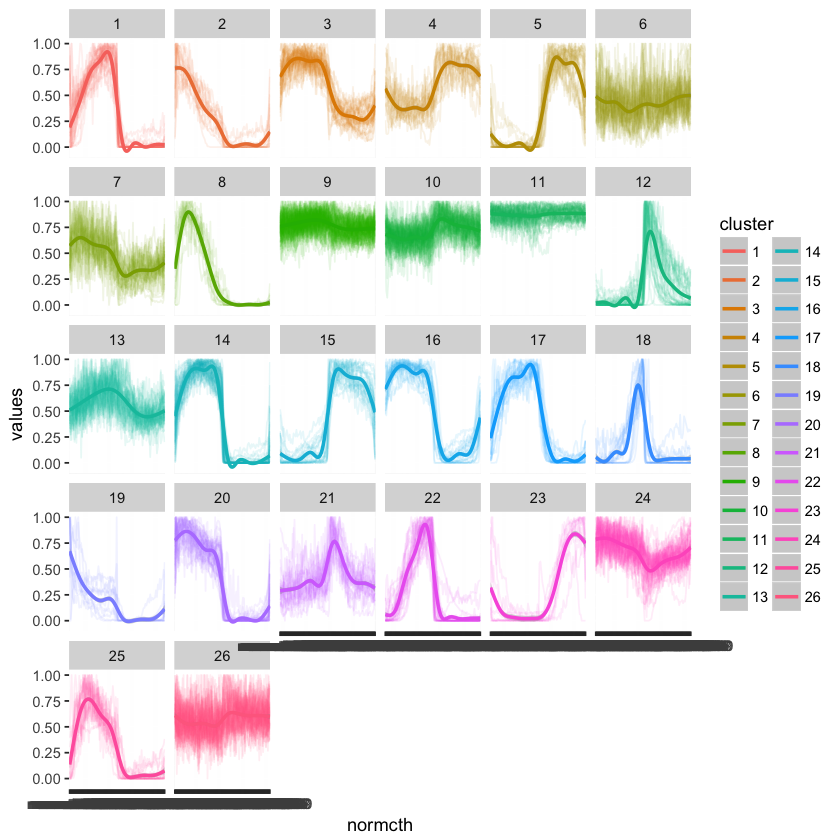

In [73]:
results %>%
  gather(normcth, values, -Cell, -cluster) %>%
  arrange(Cell, normcth) %>%
  ggplot(aes(x = normcth, y = values, group = as.factor(Cell), colour = cluster)) +
    geom_line(alpha = 0.1) +
    geom_smooth(aes(group = 1)) +
    facet_wrap(~cluster)

#### Comments  
The figure above shows the clustering has some difficulty distinguishing between cells which don't fire at all during a particular period (e.g., the early period), and cells which fire a little during that period. For example, cluster 5 looks like it could contain two group of cells, one which fires early on, while another group which does not fire at all early on. See also cluster 15, 23, 25...  

Since there is a lot of variability in the timecourses of some cells, this extra noise may be making the clustering more difficult. For instance, some cell timecourses vary a lot across time points (e.g., see the individual trajectories in cluster 6), which is unexpected since each timecourse should be an average of a large number of recordings from a single cell.  

One way to reduce that variablity is to apply some local smoothing to each individual timecourse. To do that we must decide on a smoothing span. Below are some examples of a single smoothing span on a number of different cells.

`geom_smooth()` using method = 'loess'


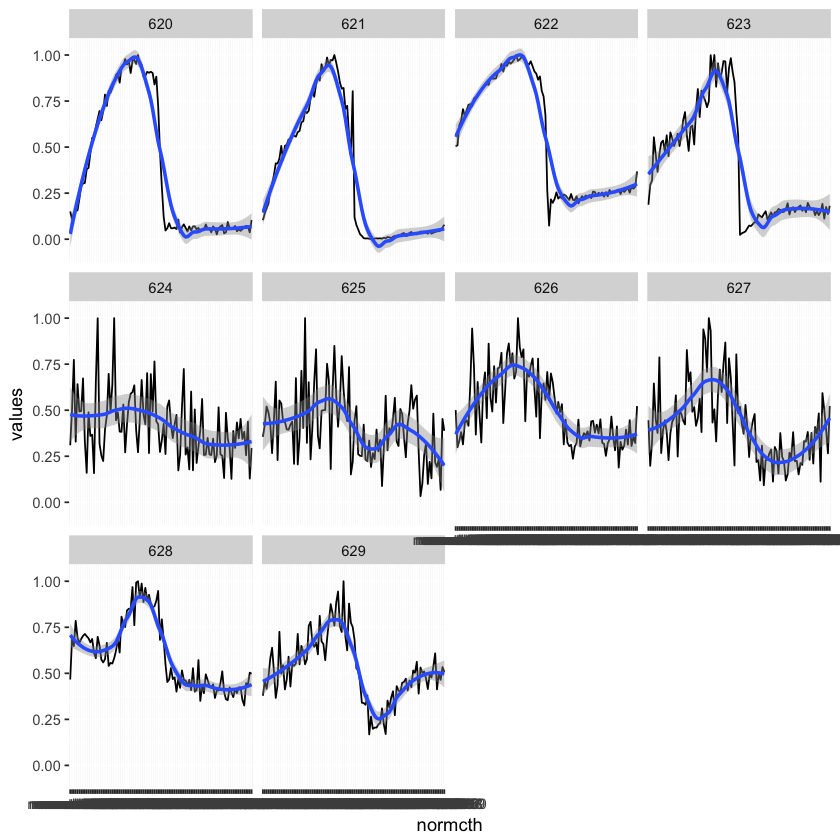

In [95]:
results %>%
  gather(normcth, values, -Cell, -cluster) %>%
  filter(Cell %in% seq(620,629)) %>%
  ggplot(aes(x = normcth, y = values)) +
    geom_line(group = 1) +
    geom_smooth(aes(group = 1), span = 0.5) +
    facet_wrap(~Cell)